# Clustering Consulting Project 

A large technology firm needs your help, they've been hacked! Luckily their forensic engineers have grabbed valuable data about the hacks, including information like session time,locations, wpm typing speed, etc. The forensic engineer relates to you what she has been able to figure out so far, she has been able to grab meta data of each session that the hackers used to connect to their servers. These are the features of the data:

* 'Session_Connection_Time': How long the session lasted in minutes
* 'Bytes Transferred': Number of MB transferred during session
* 'Kali_Trace_Used': Indicates if the hacker was using Kali Linux
* 'Servers_Corrupted': Number of server corrupted during the attack
* 'Pages_Corrupted': Number of pages illegally accessed
* 'Location': Location attack came from (Probably useless because the hackers used VPNs)
* 'WPM_Typing_Speed': Their estimated typing speed based on session logs.


The technology firm has 3 potential hackers that perpetrated the attack. Their certain of the first two hackers but they aren't very sure if the third hacker was involved or not. They have requested your help! Can you help figure out whether or not the third suspect had anything to do with the attacks, or was it just two hackers? It's probably not possible to know for sure, but maybe what you've just learned about Clustering can help!

**One last key fact, the forensic engineer knows that the hackers trade off attacks. Meaning they should each have roughly the same amount of attacks. For example if there were 100 total attacks, then in a 2 hacker situation each should have about 50 hacks, in a three hacker situation each would have about 33 hacks. The engineer believes this is the key element to solving this, but doesn't know how to distinguish this unlabeled data into groups of hackers.**

In [ ]:
#Actually in this given problem we can solve using our own PYSPARK code, We are not work using pipelines. We know about pipelines, im already performing pipelines for SUPERVISED problem, PLease ACKNOWLEDGE.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz

In [ ]:
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content//spark-3.0.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [ ]:
import numpy as np
import pandas as pd
from io import StringIO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pyspark
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('Clustering using K-Means').getOrCreate()

In [ ]:
df = spark.read.csv("/content/drive/My Drive/hack_data.csv",header=True,inferSchema=True)

In [ ]:
df.describe().show()

+-------+-----------------------+------------------+------------------+-----------------+------------------+-----------+------------------+
|summary|Session_Connection_Time| Bytes Transferred|   Kali_Trace_Used|Servers_Corrupted|   Pages_Corrupted|   Location|  WPM_Typing_Speed|
+-------+-----------------------+------------------+------------------+-----------------+------------------+-----------+------------------+
|  count|                    334|               334|               334|              334|               334|        334|               334|
|   mean|     30.008982035928145| 607.2452694610777|0.5119760479041916|5.258502994011977|10.838323353293413|       null|57.342395209580864|
| stddev|     14.088200614636158|286.33593163576757|0.5006065264451406| 2.30190693339697|  3.06352633036022|       null| 13.41106336843464|
|    min|                    1.0|              10.0|                 0|              1.0|               6.0|Afghanistan|              40.0|
|    max|           

In [ ]:
df.dtypes

[('Session_Connection_Time', 'double'),
 ('Bytes Transferred', 'double'),
 ('Kali_Trace_Used', 'int'),
 ('Servers_Corrupted', 'double'),
 ('Pages_Corrupted', 'double'),
 ('Location', 'string'),
 ('WPM_Typing_Speed', 'double')]

In [ ]:
df.head(10)

[Row(Session_Connection_Time=8.0, Bytes Transferred=391.09, Kali_Trace_Used=1, Servers_Corrupted=2.96, Pages_Corrupted=7.0, Location='Slovenia', WPM_Typing_Speed=72.37),
 Row(Session_Connection_Time=20.0, Bytes Transferred=720.99, Kali_Trace_Used=0, Servers_Corrupted=3.04, Pages_Corrupted=9.0, Location='British Virgin Islands', WPM_Typing_Speed=69.08),
 Row(Session_Connection_Time=31.0, Bytes Transferred=356.32, Kali_Trace_Used=1, Servers_Corrupted=3.71, Pages_Corrupted=8.0, Location='Tokelau', WPM_Typing_Speed=70.58),
 Row(Session_Connection_Time=2.0, Bytes Transferred=228.08, Kali_Trace_Used=1, Servers_Corrupted=2.48, Pages_Corrupted=8.0, Location='Bolivia', WPM_Typing_Speed=70.8),
 Row(Session_Connection_Time=20.0, Bytes Transferred=408.5, Kali_Trace_Used=0, Servers_Corrupted=3.57, Pages_Corrupted=8.0, Location='Iraq', WPM_Typing_Speed=71.28),
 Row(Session_Connection_Time=1.0, Bytes Transferred=390.69, Kali_Trace_Used=1, Servers_Corrupted=2.79, Pages_Corrupted=9.0, Location='Marshal

In [ ]:
df.columns

['Session_Connection_Time',
 'Bytes Transferred',
 'Kali_Trace_Used',
 'Servers_Corrupted',
 'Pages_Corrupted',
 'Location',
 'WPM_Typing_Speed']

In [ ]:
df = df.drop('Location')

In [ ]:
cat_var_names = ['Kali_Trace_Used']
num_var_names = ['Session_Connection_Time', 'Bytes Transferred', 'Servers_Corrupted', 'Pages_Corrupted', 'WPM_Typing_Speed']

In [ ]:
from pyspark.ml.feature import VectorAssembler
vector_assembler_numVars = VectorAssembler(inputCols=df.columns , outputCol="num_features_all")

In [ ]:
final_vector_assembler_numVars = vector_assembler_numVars.transform(df)

In [ ]:
final_vector_assembler_numVars.show(5)

+-----------------------+-----------------+---------------+-----------------+---------------+----------------+--------------------+
|Session_Connection_Time|Bytes Transferred|Kali_Trace_Used|Servers_Corrupted|Pages_Corrupted|WPM_Typing_Speed|    num_features_all|
+-----------------------+-----------------+---------------+-----------------+---------------+----------------+--------------------+
|                    8.0|           391.09|              1|             2.96|            7.0|           72.37|[8.0,391.09,1.0,2...|
|                   20.0|           720.99|              0|             3.04|            9.0|           69.08|[20.0,720.99,0.0,...|
|                   31.0|           356.32|              1|             3.71|            8.0|           70.58|[31.0,356.32,1.0,...|
|                    2.0|           228.08|              1|             2.48|            8.0|            70.8|[2.0,228.08,1.0,2...|
|                   20.0|            408.5|              0|             3.57

In [ ]:
from pyspark.ml.feature import MinMaxScaler
min_max_Scalar_NumVars = MinMaxScaler(inputCol='num_features_all',outputCol="scaled_num_features")

In [ ]:
data_scale=min_max_Scalar_NumVars.fit(final_vector_assembler_numVars)
data_scale_output=data_scale.transform(final_vector_assembler_numVars)
data_scale_output.show(2)

+-----------------------+-----------------+---------------+-----------------+---------------+----------------+--------------------+--------------------+
|Session_Connection_Time|Bytes Transferred|Kali_Trace_Used|Servers_Corrupted|Pages_Corrupted|WPM_Typing_Speed|    num_features_all| scaled_num_features|
+-----------------------+-----------------+---------------+-----------------+---------------+----------------+--------------------+--------------------+
|                    8.0|           391.09|              1|             2.96|            7.0|           72.37|[8.0,391.09,1.0,2...|[0.11864406779661...|
|                   20.0|           720.99|              0|             3.04|            9.0|           69.08|[20.0,720.99,0.0,...|[0.32203389830508...|
+-----------------------+-----------------+---------------+-----------------+---------------+----------------+--------------------+--------------------+
only showing top 2 rows



In [ ]:
from pyspark.ml.clustering import KMeans
kmeans_1 = KMeans(k=3,featuresCol='scaled_num_features')
model_1 = kmeans_1.fit(data_scale_output)

In [ ]:
pred_1 = model_1.transform(data_scale_output).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   79|
|         2|   88|
|         0|  167|
+----------+-----+



In [ ]:
#in this case three hackers dont have same amount of attacks. So we can say that 3rd hacker has not involve in this firm hack

In [ ]:
kmeans = KMeans(k=2,featuresCol='scaled_num_features')
model = kmeans.fit(data_scale_output)

In [ ]:
#class pyspark.ml.clustering.KMeans(*, featuresCol: str = 'features', predictionCol: str = 'prediction', k: int = 2, initMode: str = 'k-means||', initSteps: int = 2, tol: float = 0.0001, maxIter: int = 20, seed: Optional[int] = None, distanceMeasure: str = 'euclidean', weightCol: Optional[str] = None)[source]
#K-means clustering with a k-means++ like initialization mode (the k-means|| algorithm by Bahmani et al).

#New in version 1.5.0

In [ ]:
pred_data = model.transform(data_scale_output)
pred_data = model.transform(data_scale_output).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  167|
|         0|  167|
+----------+-----+



In [ ]:
#in this case two hackers  have same amount of attacks. So that we can conclude that only two hackers has been involved in the hacking the large firm.

In [ ]:
pred_final = pred_data.toPandas()

In [ ]:
pred_final.to_csv("./Clustering_Consulting_Project.csv")

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
#for suppose we dont dont know about the clusters but we have condition to find out the how many hackers will involved in equal amount of total attacks, in this case we can do that silhoutte analysis

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='scaled_num_features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,15):
    
    KMeans_algo=KMeans(featuresCol='scaled_num_features', k=i)
    
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    
    output=KMeans_fit.transform(data_scale_output)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score, "for the k:",i)

Silhouette Score: 0.7164144437618303 for the k: 2
Silhouette Score: 0.7703982101267363 for the k: 3
Silhouette Score: 0.9133952401211849 for the k: 4
Silhouette Score: 0.7667368196078377 for the k: 5
Silhouette Score: 0.6163370689731313 for the k: 6
Silhouette Score: 0.4900450347290556 for the k: 7
Silhouette Score: 0.49745206932747116 for the k: 8
Silhouette Score: 0.3311454059458522 for the k: 9
Silhouette Score: 0.33344255636631503 for the k: 10
Silhouette Score: 0.3273875623096276 for the k: 11
Silhouette Score: 0.32795135093632183 for the k: 12
Silhouette Score: 0.3220089312283718 for the k: 13
Silhouette Score: 0.3156931912702835 for the k: 14


Text(0, 0.5, 'Distance')

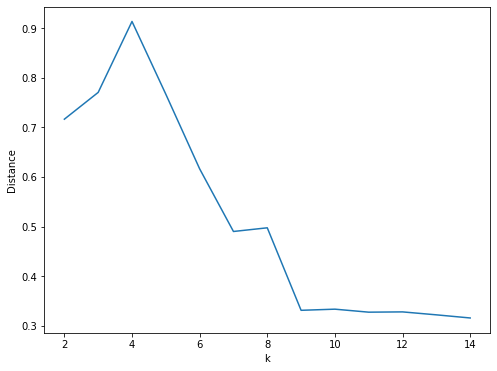

In [ ]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,15),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('Distance')

In [ ]:
#In this graph shows that N_cluster = 9 (approx), but we conclude those number of hackers not do same amount of attacks, So that we can take the based on silhoutte score whatever score is near to [+1] is best suited for the N_clusters, Im considering cluster=4 is best. 

In [ ]:
kmeans_3 = KMeans(k=4,featuresCol='scaled_num_features')
model_3 = kmeans_3.fit(data_scale_output)

In [ ]:
pred_data_1 = model_3.transform(data_scale_output)
pred_data_1 = model_3.transform(data_scale_output).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   79|
|         3|   88|
|         2|   84|
|         0|   83|
+----------+-----+



In [ ]:
#im using cluster=4 eventhough my data is varying 2-3% nearly so that it is not affect tooo much, This method is useful for wherever finding the number of cluster in Pyspark like elbow method in pandas.
#In this clustering we cannnot perform string indexing , why because there is no target variable 